# Car Price Prediction Model 🏎️

<img src="car.png" alt="caaar">


# The Data 💾
| Feature    | Description |
|------------|-------------|
| carID      | Unique identifier for each car |
| year       | The year the car was manufactured |
| mileage    | Total distance the car has traveled since it was manufactured |
| tax        | Amount of tax associated with the car |
| mpg        | Miles Per Gallon - a measure of fuel efficiency |
| engineSize | Size of the car's engine, typically in liters |
| price      | Price of the car |




# Importing Needed Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
cmap = sns.color_palette(["black", "orange", "gray"])

## Data Overview

In those next cells, we load data and display the first 5 rows to take a peek look of the data, after loading the data we want to get basic information about our dataset. This includes the number of entries, the number of non-null entries for each column, and the data type of each column.Then get a simple statistical description of the each feature.

In [2]:
data = pd.read_csv('car price.csv')
data.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870.0,Diesel,125,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151.0,Petrol,145,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423.0,Diesel,30,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145,47.1,1.0,16990


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         4960 non-null   int64  
 1   brand         4942 non-null   object 
 2   model         4960 non-null   object 
 3   year          4960 non-null   int64  
 4   transmission  4960 non-null   object 
 5   mileage       4954 non-null   float64
 6   fuelType      4943 non-null   object 
 7   tax           4960 non-null   int64  
 8   mpg           4948 non-null   float64
 9   engineSize    4952 non-null   float64
 10  price         4960 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 426.4+ KB


In [4]:
data.describe()

,carID,year,mileage,tax,mpg,engineSize,price
count,4960.000000,4960.000000,4954.000000,4960.000000,4948.000000,4952.000000,4960.000000
mean,15832.446169,2016.737903,24949.957812,152.332661,50.390158,2.123425,23469.943750
std,2206.717006,2.884035,24451.380600,82.403844,35.781756,0.786778,16406.714563
min,12002.000000,1997.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,13929.250000,2016.000000,5622.500000,145.000000,38.700000,1.600000,12000.000000
50%,15840.000000,2017.000000,18971.500000,145.000000,47.100000,2.000000,18999.000000
75%,17765.750000,2019.000000,36692.750000,150.000000,54.300000,2.800000,30335.750000
max,19629.000000,2020.000000,259000.000000,580.000000,470.800000,6.600000,145000.000000


In [5]:
data.shape

(4960, 11)

## Dropping Duplicates
To check the duplicates, we will drop the carID column first. We found that there were 30 row that are Duplicated.

In [6]:
data = data.drop('carID',axis=1)

#has very low corelation with price
#(didn't affect the accuracy)
data = data.drop('model',axis=1)

In [7]:
data.duplicated().sum()

30

In [8]:
data= data.drop_duplicates()

## Encoding
Then we are going to convert the categorical features into numerical. The convertion will depend on the analysis of the relation between the features and the price.

In [9]:
for c in data.columns:
  if data[c].dtype == 'object':
    print(c)
    print(data[c].unique())

brand
['hyundi' 'vauxhall' 'audi' 'vw' 'skoda' 'merc' 'toyota' 'bmw' 'ford' nan]
transmission
['Semi-Auto' 'Manual' 'Automatic' 'Other']
fuelType
['Diesel' 'Petrol' 'Hybrid' 'Other' 'Electric' nan]


In [10]:
#fill nulls in categorical columns teprorally into -1 just to enable converting categorical into numerical 
for c in data.columns:
    if data[c].dtype == 'object':
        data[c] = data[c].fillna(-1)

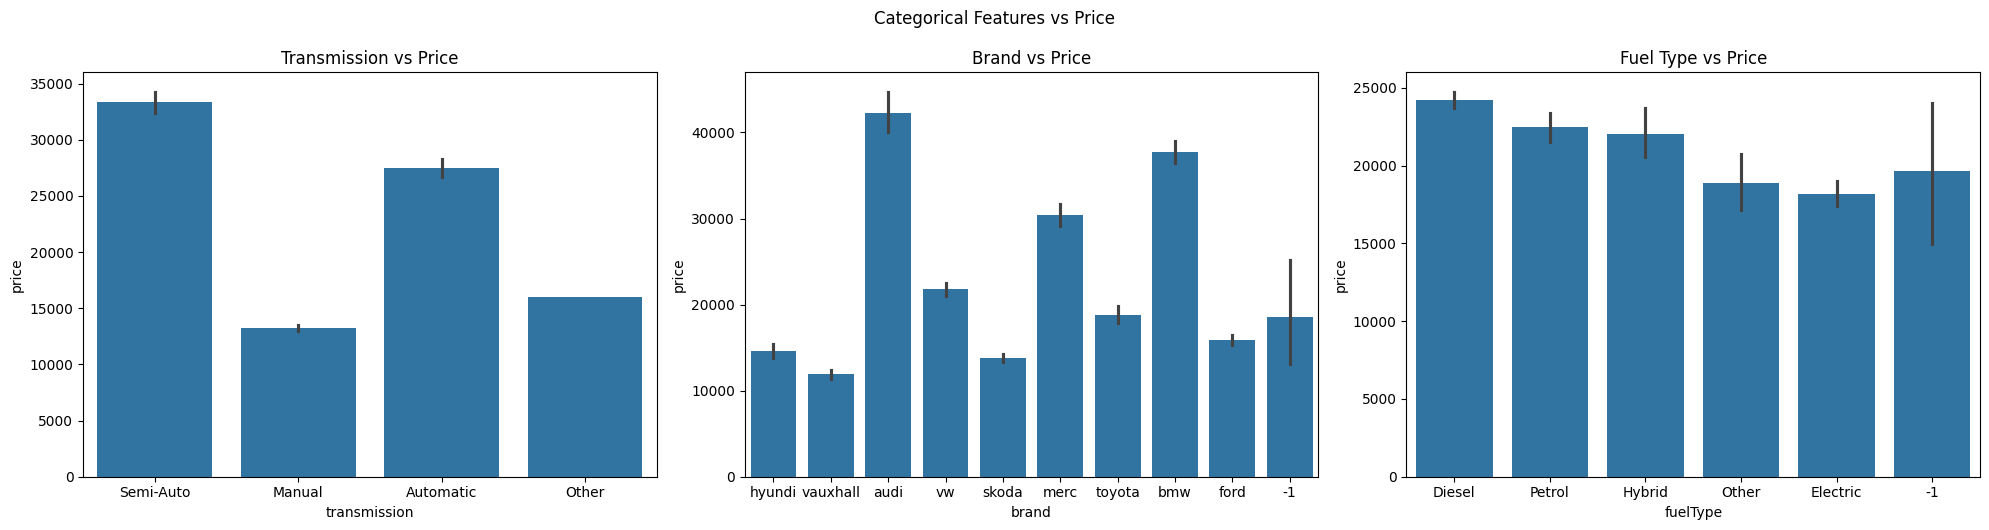

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))  

sns.barplot(x=data['transmission'], y='price', data=data, ax=axs[0])
axs[0].set_title('Transmission vs Price')  

sns.barplot(x=data['brand'], y='price', data=data, ax=axs[1])
axs[1].set_title('Brand vs Price')  

sns.barplot(x=data['fuelType'], y='price', data=data, ax=axs[2])
axs[2].set_title('Fuel Type vs Price')  

plt.tight_layout()  # To ensure the subplots do not overlap

plt.suptitle('Categorical Features vs Price', x=0.5, y=1.05)  

plt.show()  

In [12]:
#convert categorical data into numerical 
data['transmission'] = data['transmission'].replace({'Manual':0,'Other':1,'Automatic':2, 'Semi-Auto':3})
data['transmission'] = data['transmission'].astype(int)

data['fuelType'] = data['fuelType'].replace({'Electric':0,'Other':1,'Hybrid':2, 'Petrol':3,'Diesel':4})
data['fuelType'] = data['fuelType'].astype(int)

data['brand'] = data['brand'].replace({'vauxhall':0,'skoda':1,'hyundi':2, 'ford':3,'toyota':4,'vw':5,'merc':6,'bmw':7,'audi':8 })
data['brand'] = data['brand'].astype(int)

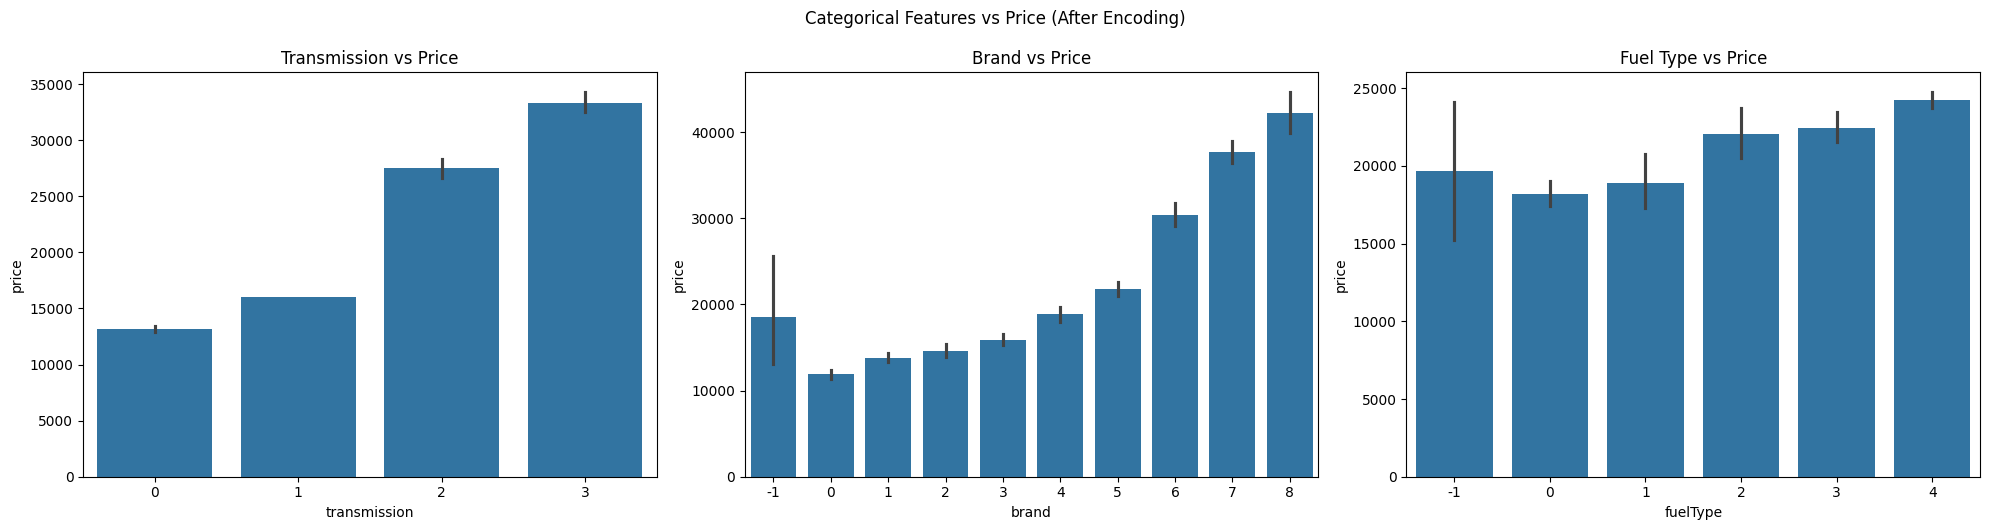

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))  

sns.barplot(x=data['transmission'], y='price', data=data, ax=axs[0])
axs[0].set_title('Transmission vs Price')  

sns.barplot(x=data['brand'], y='price', data=data, ax=axs[1])
axs[1].set_title('Brand vs Price')  

sns.barplot(x=data['fuelType'], y='price', data=data, ax=axs[2])
axs[2].set_title('Fuel Type vs Price')  

plt.tight_layout()  # To ensure the subplots do not overlap

plt.suptitle('Categorical Features vs Price (After Encoding)', x=0.5, y=1.05)  

plt.show()  

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 0 to 4959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4930 non-null   int32  
 1   year          4930 non-null   int64  
 2   transmission  4930 non-null   int32  
 3   mileage       4924 non-null   float64
 4   fuelType      4930 non-null   int32  
 5   tax           4930 non-null   int64  
 6   mpg           4918 non-null   float64
 7   engineSize    4922 non-null   float64
 8   price         4930 non-null   int64  
dtypes: float64(3), int32(3), int64(3)
memory usage: 327.4 KB


## Data Quality 
In next cells, we will assess the quality of the data by counting the number of missing values in each feature. This step is crucial in determining how to handle the missing values during the data preprocessing phase. Additionally, checking if we have any ifininte values.

In [15]:
# Check for infinity
is_infinity = data.isin([np.inf, -np.inf])

print("\nChecking for infinity:")
print(is_infinity.sum())


Checking for infinity:
brand           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64


In [16]:
#retuen each -1 in the 4 columns changed to null to replace it with more logical value
data['transmission']=data['transmission'].replace(-1,np.nan)
data['brand']=data['brand'].replace(-1,np.nan)
data['fuelType']=data['fuelType'].replace(-1,np.nan)

In [17]:
data.isnull().sum()

brand           18
year             0
transmission     0
mileage          6
fuelType        17
tax              0
mpg             12
engineSize       8
price            0
dtype: int64

In [18]:
col_names = data.columns

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, metric='nan_euclidean')
data = imputer.fit_transform(data)

data = pd.DataFrame(data, columns=col_names)

In [19]:
data.isnull().sum()

brand           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

## Feature Extraction
Adding new features from already existing ones to help the machine learn faster.

In [20]:
data['Tax Per Mileage']= data['tax']/data['mileage']

In [21]:
data.head(5)

,brand,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,Tax Per Mileage
0,2.0,2019.0,3.0,4223.0,4.0,145.0,39.8,2.2,31995.0,0.034336
1,0.0,2015.0,0.0,47870.0,4.0,125.0,60.1,2.0,7700.0,0.002611
2,8.0,2019.0,2.0,5151.0,3.0,145.0,29.1,2.9,58990.0,0.028150
3,5.0,2016.0,2.0,20423.0,4.0,30.0,57.6,2.0,12999.0,0.001469
4,1.0,2020.0,3.0,3569.0,3.0,145.0,47.1,1.0,16990.0,0.040628


## Feature Selection
In this step we use heatmap to determine the correlation between the fearures and how it affects the model prediction. While performing it we discover that the model column has a low correlation with the price ,so we dropped it. Moreover we tried to add some features such as the age of the car and the fuel effency. However, it has a high correlation with other features such as the mpg. That indicate a redundance features. Therefore we discard it

In [22]:
correlation=data.corr()
correlation['price']

brand              0.551981
year               0.502129
transmission       0.520798
mileage           -0.479529
fuelType           0.057001
tax                0.145761
mpg               -0.177274
engineSize         0.626923
price              1.000000
Tax Per Mileage    0.063067
Name: price, dtype: float64

<Axes: >

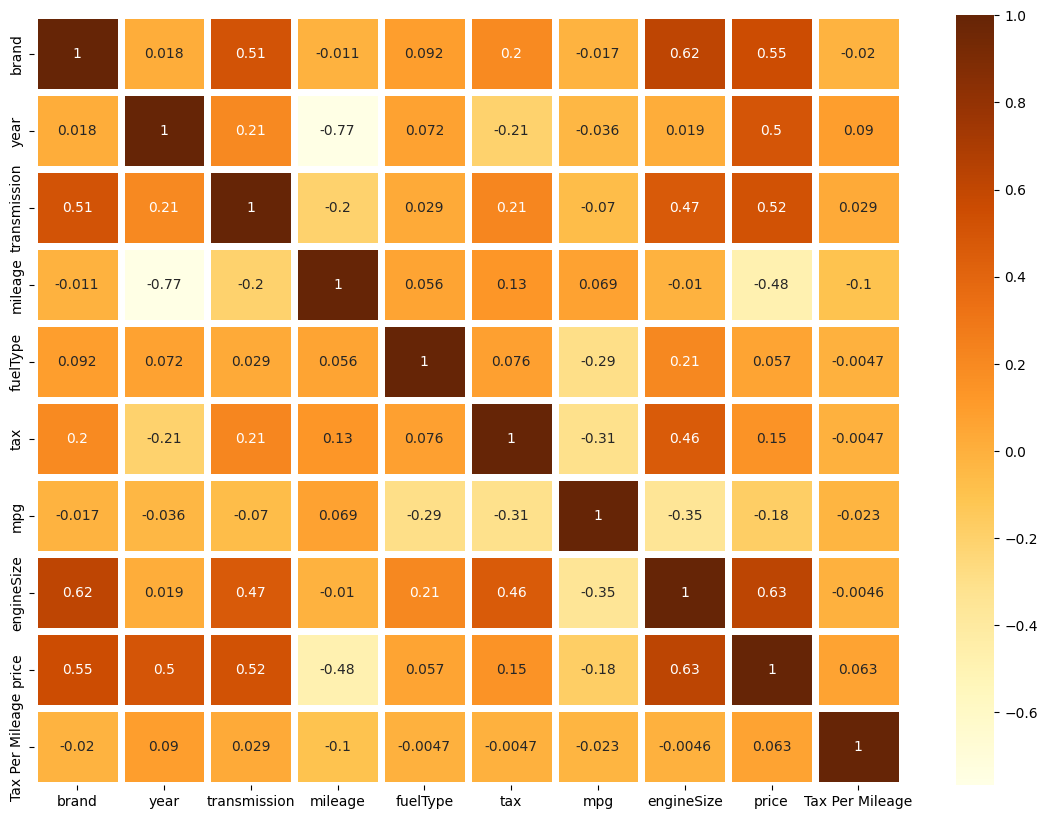

In [23]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), cmap='YlOrBr', annot=True, linewidths=5)

## Normalization & Outliers

Visualize the data to find if there any outliers or not. The graphs used make it easier to detemine the scale of the data, then normalize them.

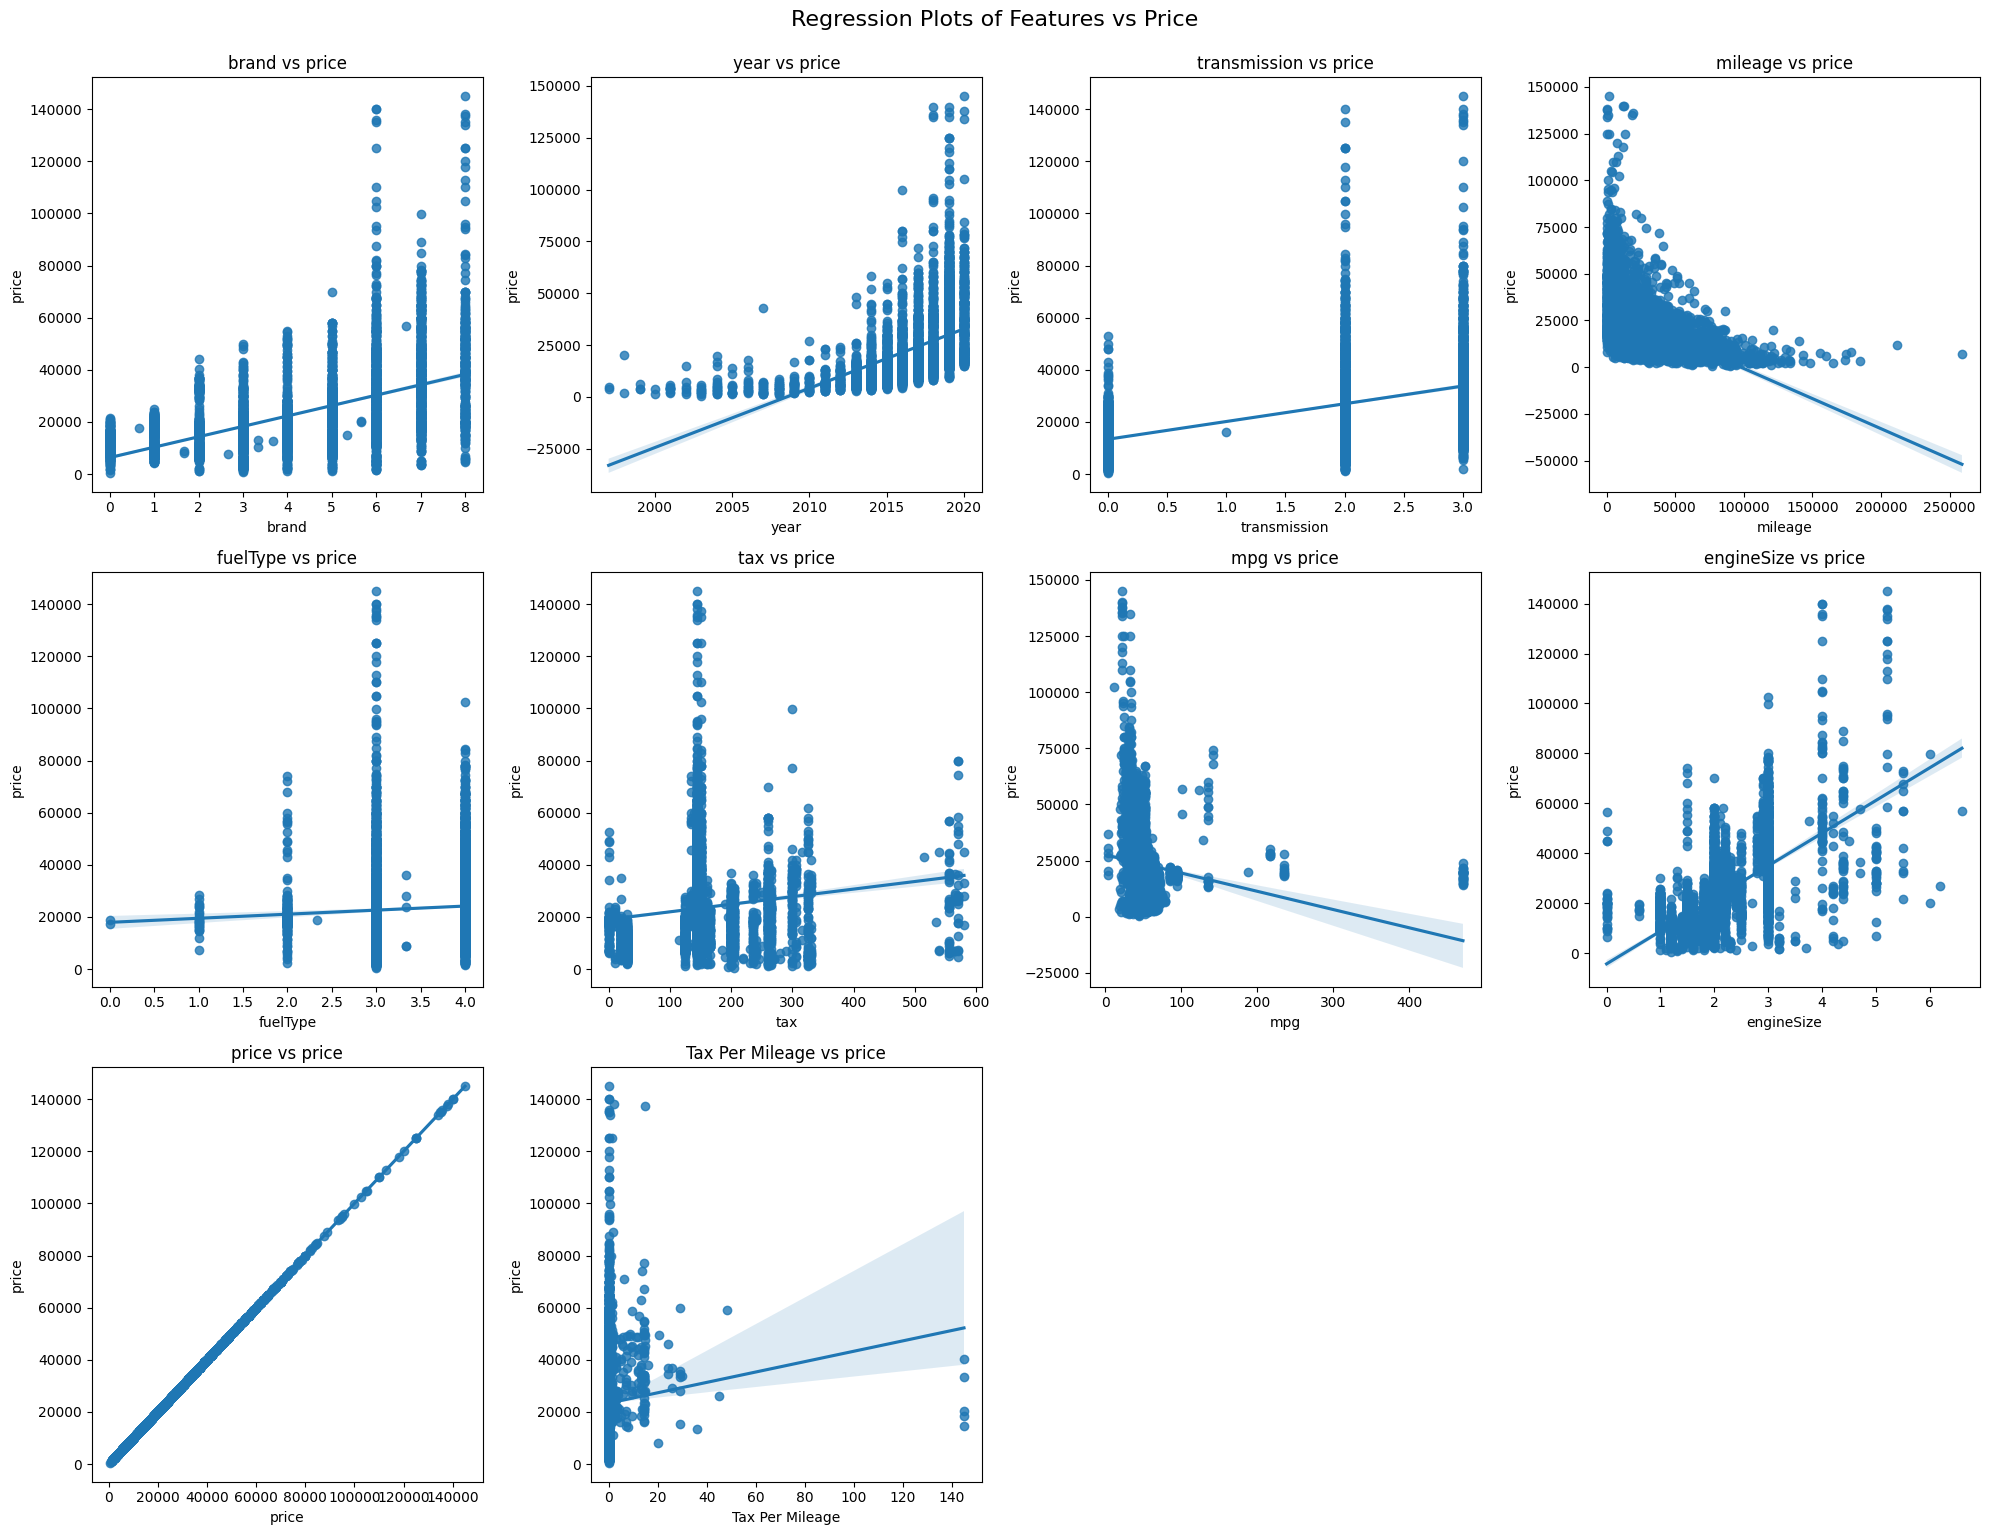

In [24]:
# Calculate the number of rows needed for subplots
n = len(data.columns)
rows = int(np.ceil(n/4))

fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))

axs = axs.flatten()

for i, c in enumerate(data.columns):
    sns.regplot(data=data, x=c, y='price', ax=axs[i])
    axs[i].set_title(f'{c} vs price')

# Remove any unused subplots
if n % 4:
    for j in range(n, rows*4):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle('Regression Plots of Features vs Price', x=0.5, y=1.02, fontsize=16)
plt.show()


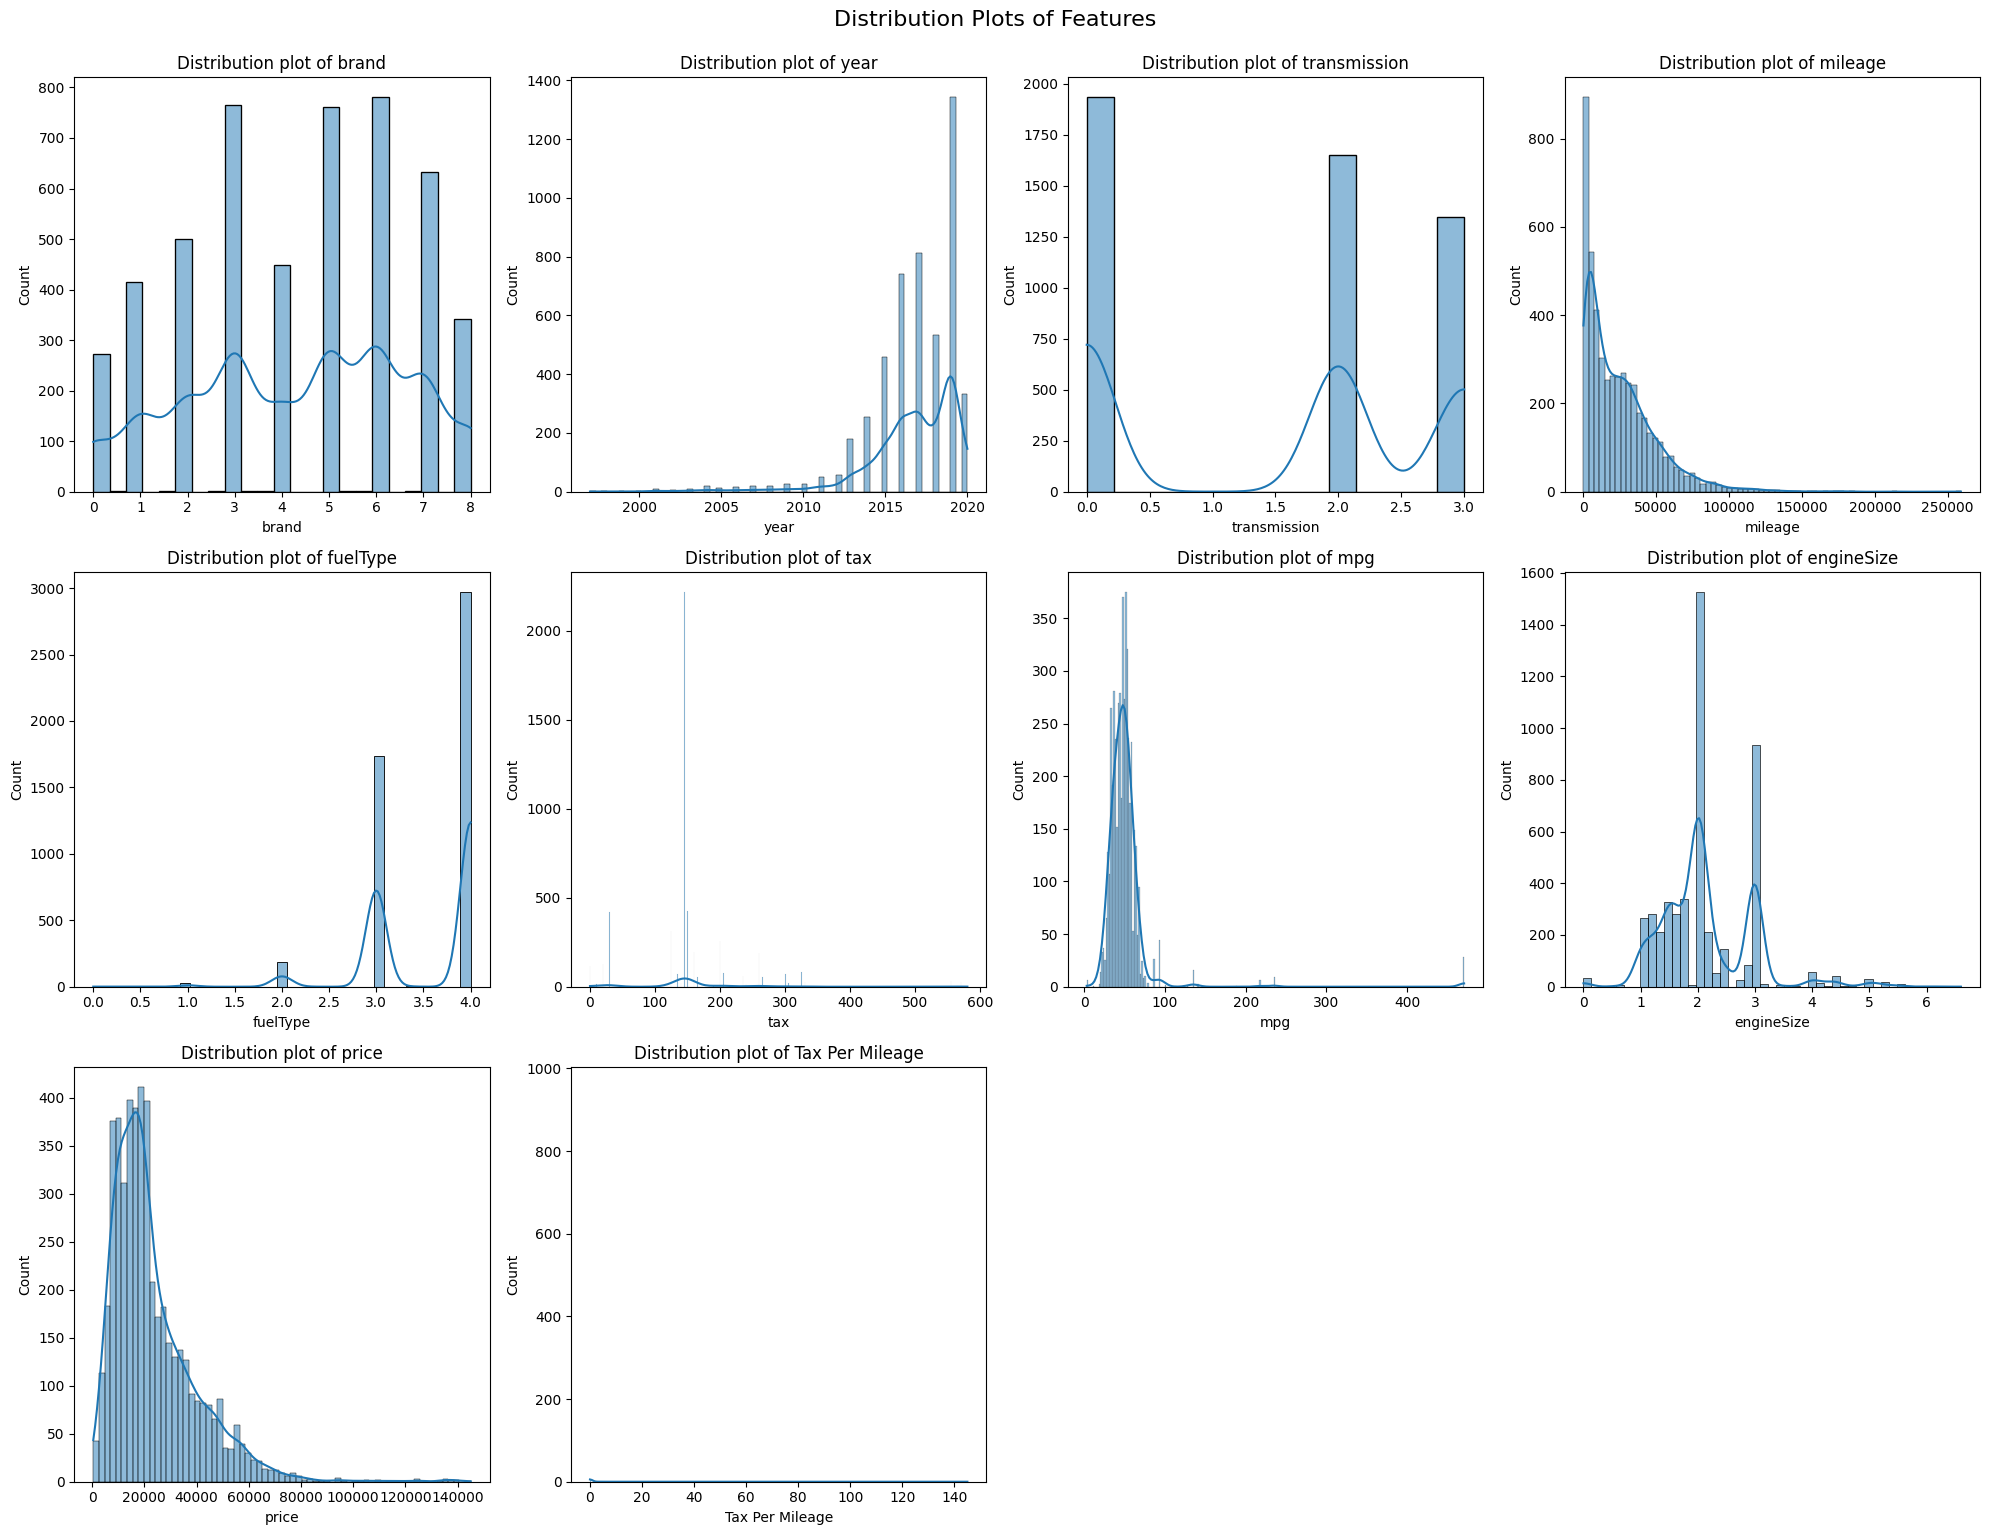

In [25]:
n = len(data.columns)
rows = int(np.ceil(n/4))

fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))

# Flatten the axes array, to make iterating over it easier
axs = axs.flatten()

for i, c in enumerate(data.columns):
    sns.histplot(data[c], ax=axs[i], kde=True)
    axs[i].set_title(f'Distribution plot of {c}')

# Remove any unused subplots
if n % 4:
    for j in range(n, rows*4):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle('Distribution Plots of Features', x=0.5, y=1.02, fontsize=16)
plt.show()


array([[<Axes: title={'center': 'brand'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'transmission'}>],
       [<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'fuelType'}>,
        <Axes: title={'center': 'tax'}>],
       [<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'engineSize'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'Tax Per Mileage'}>, <Axes: >, <Axes: >]],
      dtype=object)

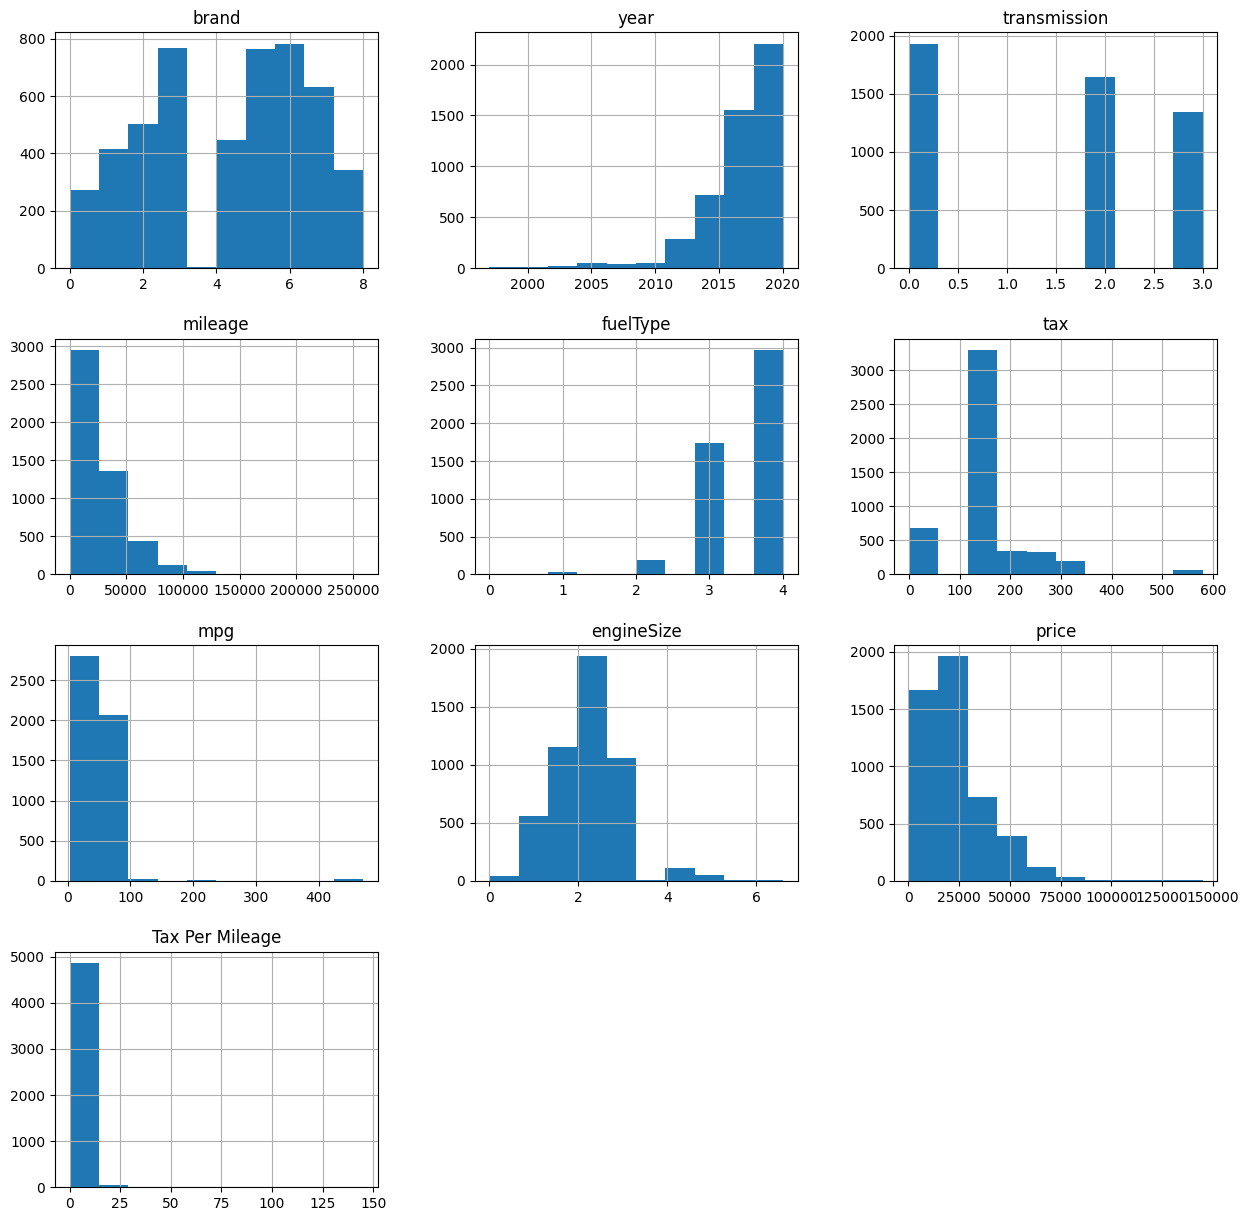

In [26]:
data.hist(figsize=(15,15))

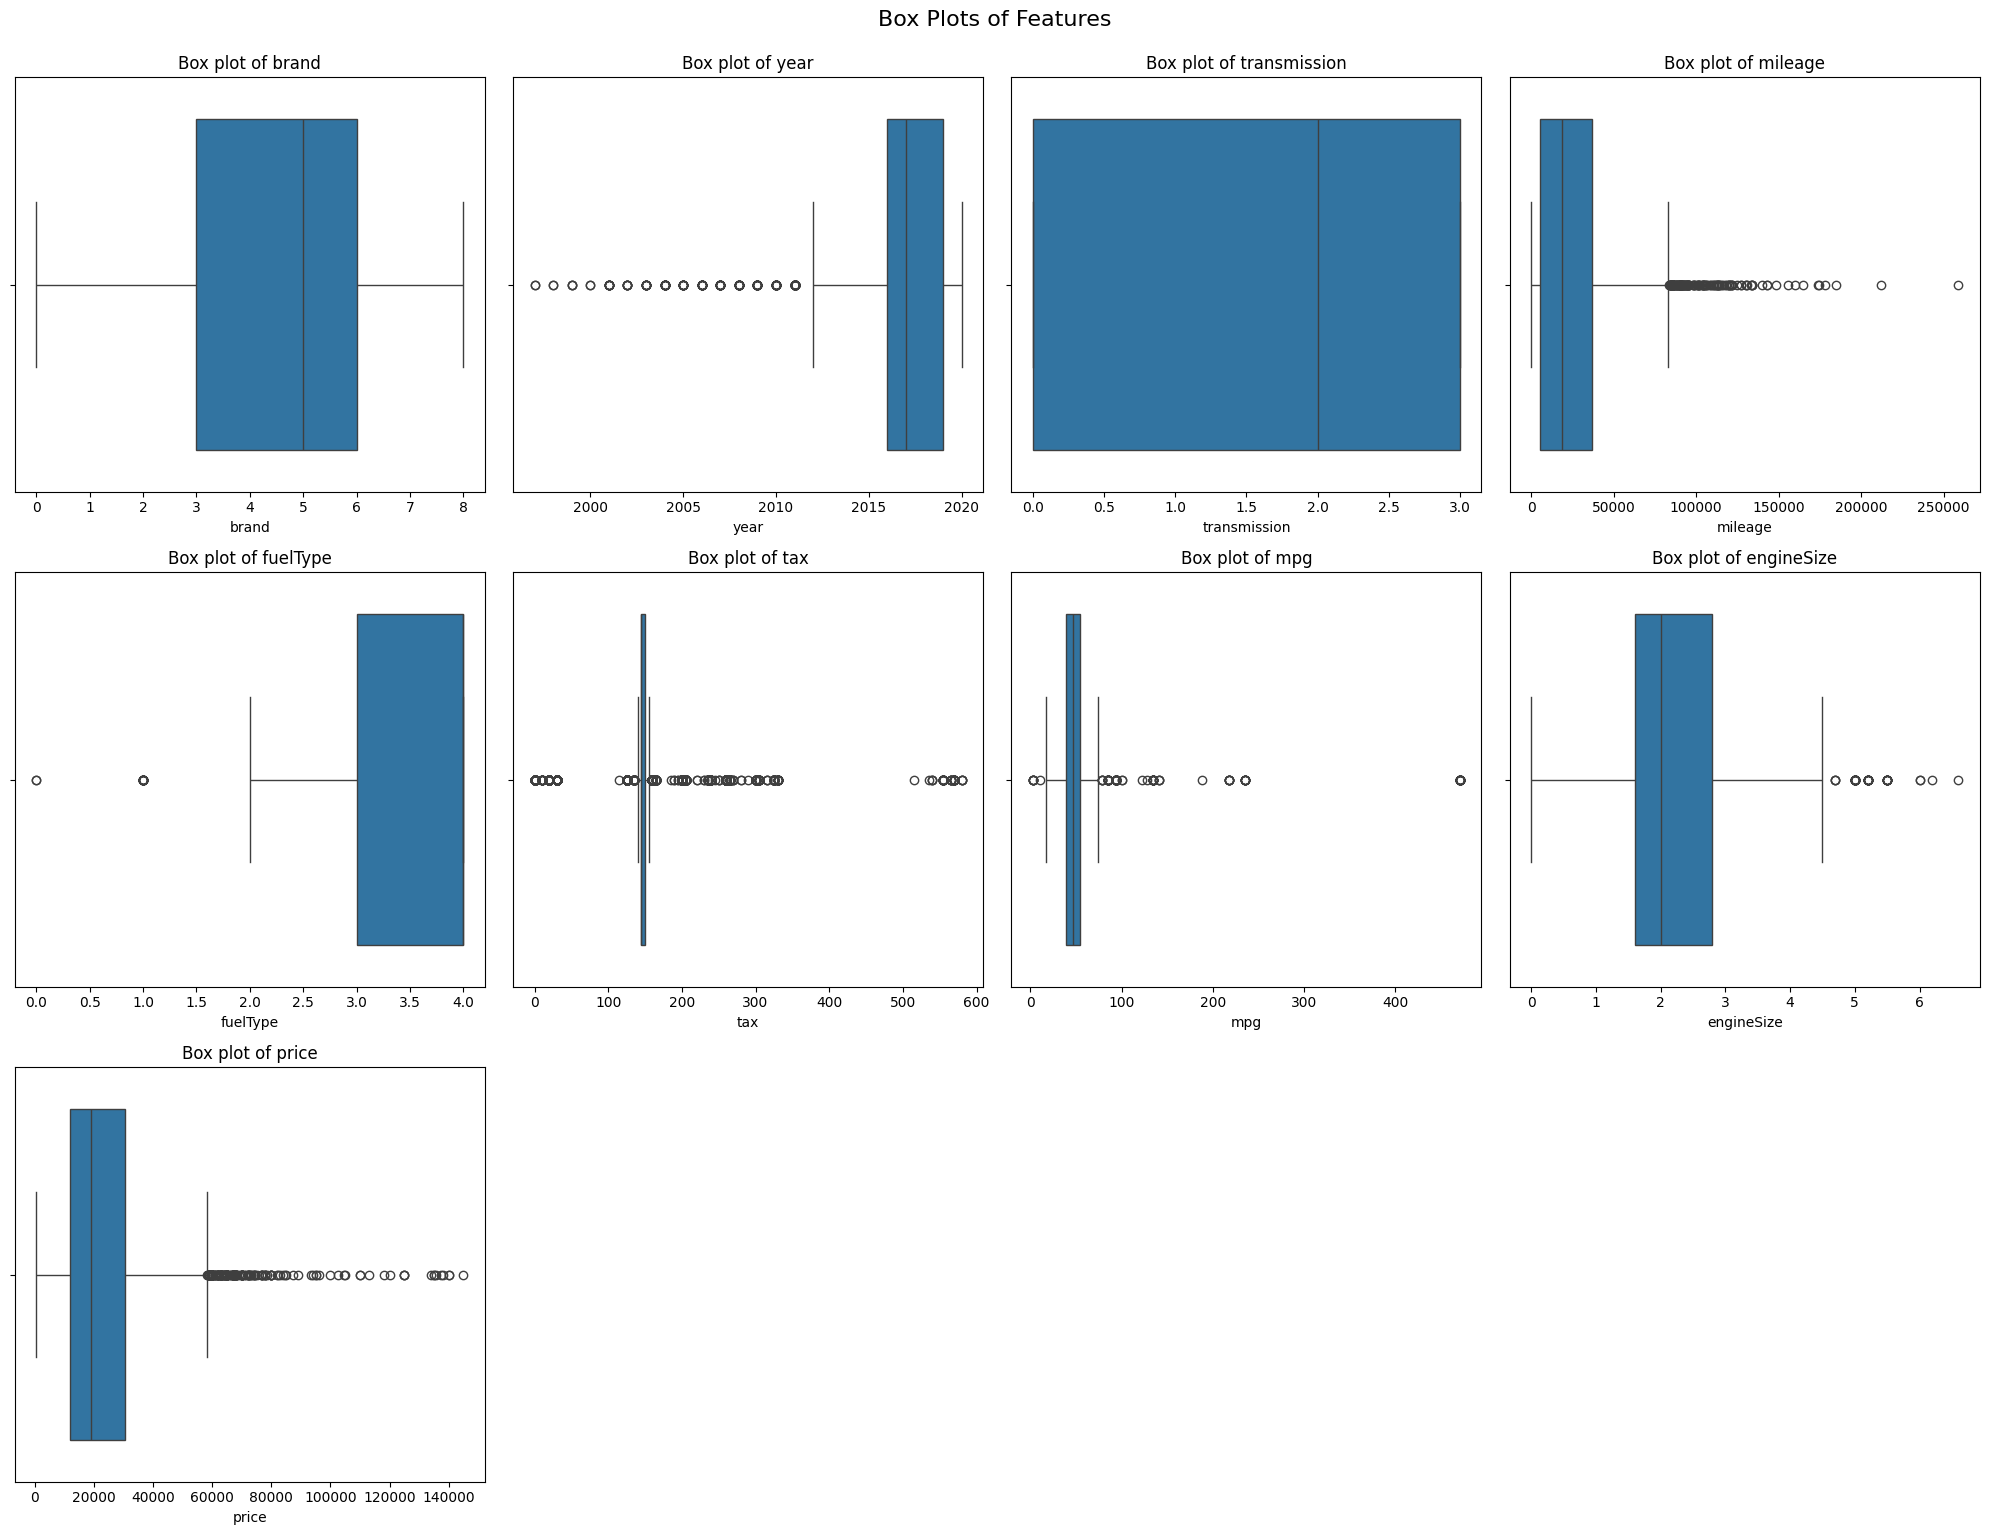

In [27]:
n = len(data.columns[:-1])
rows = int(np.ceil(n/4))

fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))

# Flatten the axes array, to make iterating over it easier
axs = axs.flatten()

for i, c in enumerate(data.columns[:-1]):
    sns.boxplot(x=data[c], ax=axs[i])
    axs[i].set_title(f'Box plot of {c}')

# Remove any unused subplots
if n % 4:
    for j in range(n, rows*4):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle('Box Plots of Features', x=0.5, y=1.02, fontsize=16)
plt.show()

In [28]:
#normalization of the data using log
data['mileage'] = np.log1p(data['mileage'])
data['mpg'] = np.log1p(data['mpg'])
data['tax'] = np.log1p(data['tax'])
data['engineSize'] = np.log1p(data['engineSize'])
data['price'] = np.log1p(data['price'])

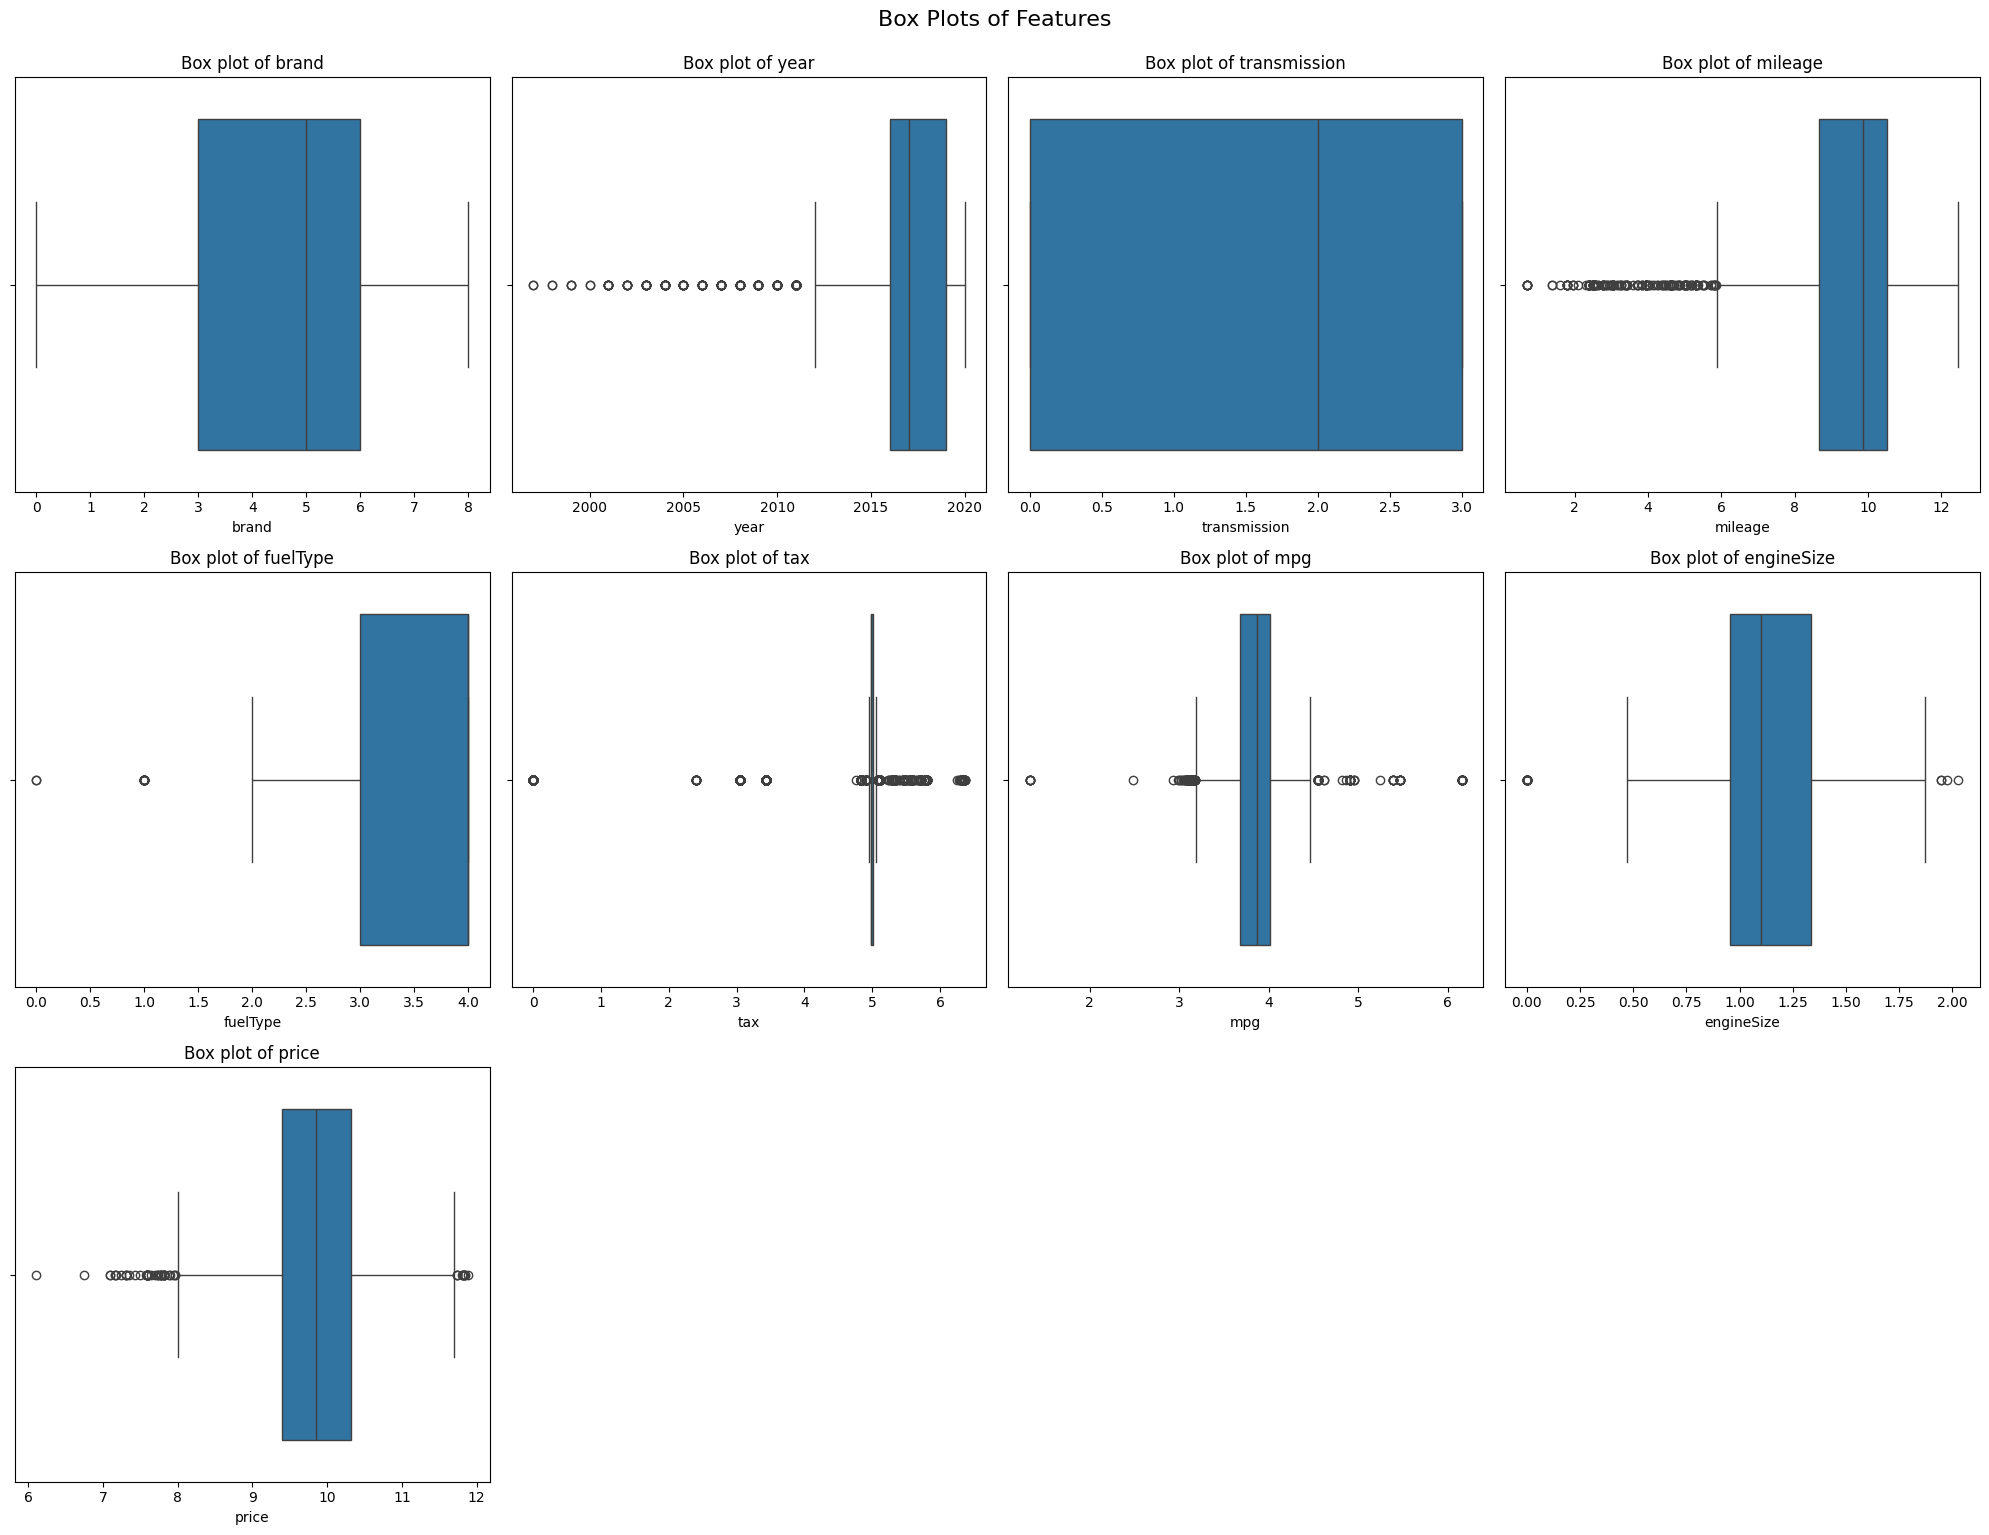

In [29]:
n = len(data.columns[:-1])
rows = int(np.ceil(n/4))

fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))

# Flatten the axes array, to make iterating over it easier
axs = axs.flatten()

for i, c in enumerate(data.columns[:-1]):
    sns.boxplot(x=data[c], ax=axs[i])
    axs[i].set_title(f'Box plot of {c}')

# Remove any unused subplots
if n % 4:
    for j in range(n, rows*4):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle('Box Plots of Features', x=0.5, y=1.02, fontsize=16)
plt.show()

## Modeling and Evaluation
Apply the linear regression model on the data.

In [30]:
features = data.drop('price',axis=1)

target = data['price']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

features.head()

,brand,year,transmission,mileage,fuelType,tax,mpg,engineSize,Tax Per Mileage
0,2.0,2019.0,3.0,8.348538,4.0,4.983607,3.708682,1.163151,0.034336
1,0.0,2015.0,0.0,10.776265,4.0,4.836282,4.112512,1.098612,0.002611
2,8.0,2019.0,2.0,8.547140,3.0,4.983607,3.404525,1.360977,0.028150
3,5.0,2016.0,2.0,9.924466,4.0,3.433987,4.070735,1.098612,0.001469
4,1.0,2020.0,3.0,8.180321,3.0,4.983607,3.873282,0.693147,0.040628


In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [32]:
predictions = linear_model.predict(X_train)
print("The accuracy of train is:",r2_score(y_train,predictions)*100)

predictions = linear_model.predict(X_test)
print("The accuracy of test is:",r2_score(y_test,predictions)*100)

The accuracy of train is: 85.05738396029858
The accuracy of test is: 86.71594653097938


Text(0, 0.5, 'relation between actual and predicted data')

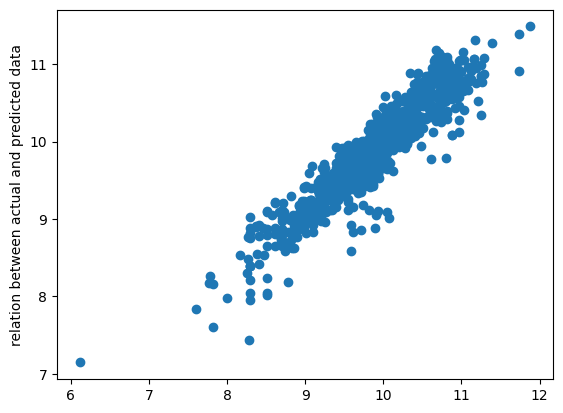

In [33]:
plt.scatter(y_test, predictions)
plt.ylabel("relation between actual and predicted data")

C:\Users\SPEED\AppData\Local\Temp\ipykernel_14168\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='price', ylabel='Density'>

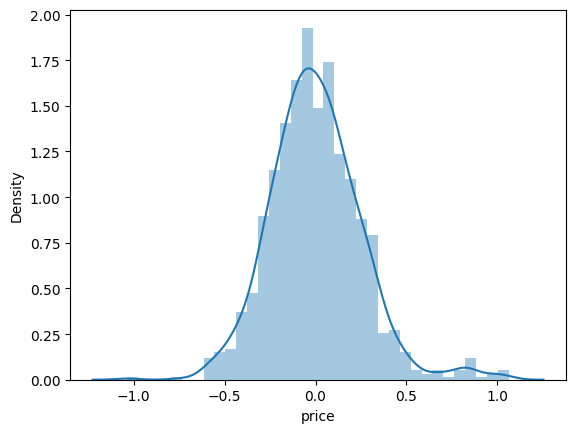

In [34]:
sns.distplot(y_test-predictions)

## Hyperparameter Tuning for Regression model
we tune the the hyperparameters  of the linear regeression model which is the alpha or learning rate hyper parameter using grid search. Then  print the best parameters and the r2 score

In [35]:
#### tuning 

# Define the model
model = Ridge()

# Define the grid of hyperparameters 'param_grid'
param_grid = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Use gridsearch to test all values for 'alpha'
model_gscv = GridSearchCV(model, param_grid, cv=5)

# Fit model to data
model_gscv.fit(X_train,y_train)

# Find the best value for 'alpha'
print("Best alpha: ", model_gscv.best_params_)

pred_tune = model_gscv.predict(X_train)
print("The accuracy of train is:",r2_score(y_train,pred_tune)*100)

pred_tune = linear_model.predict(X_test)
print("The accuracy of test is:",r2_score(y_test,pred_tune)*100)


Best alpha:  {'alpha': 1}
The accuracy of train is: 85.05699077846874
The accuracy of test is: 86.71594653097938
